Introduction to Instagram Analysis:

In today's digital landscape, social media platforms have become powerful tools for individuals and businesses alike to connect, engage, and share content with a global audience. Instagram, one of the leading platforms in this realm, has emerged as a hub for visual storytelling, where captivating images and videos have the potential to drive user engagement and brand visibility.

In this comprehensive analysis, we delve into the world of Instagram to uncover valuable insights into user behavior, content performance, and engagement trends. Through a meticulous examination of vast and diverse datasets spanning 10,000 rows and 147 columns, we aim to provide a detailed and data-driven perspective on how users interact with content on Instagram.

Our analysis encompasses a wide range of key metrics, including impressions, reach, engagement rates, likes, comments, and saves, to paint a holistic picture of the Instagram landscape. We explore user activity patterns across different months, days of the week, and hours of the day, shedding light on when and how users are most actively engaging with content. Additionally, we investigate the impact of content types, such as photos, videos, and carousels, on user interactions and delve into the correlations between various engagement metrics.

Through this Instagram analysis, we aim to empower you with actionable insights that can inform your content strategy, enhance audience engagement, and drive meaningful interactions with your Instagram community. Whether you're an individual seeking to grow your personal brand or a business looking to expand your online presence, these findings will serve as a valuable resource to optimize your Instagram journey and make the most of this dynamic social media platform.

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = 'C:\\Users\\HP\\Documents\\WORKSPACE\\Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.xls'
df= pd.read_excel(data)

In [3]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,1/30/2023 5:06 pm,18216468940204200,Instagram,Post,Carousel,stanbicibtc,,https://www.instagram.com/p/CoC6CKBIHbV/,The new Naira banknotes in circulation have se...,NaN,39681.0,39681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32418.0,32418.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0489,0.0599,1942,1261,1261,NaN,NaN,NaN,NaN,NaN,NaN,56,NaN,625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/15/2022 9:04 am,17971531720518100,Instagram,Post,Photo,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CcXUQTEMRm7/,We hope the faith that this #GoodFriday restor...,NaN,29186.0,29186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25055.0,25055.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0604,0.0704,1763,709,709,NaN,NaN,NaN,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 147 entries, Date to Tags
dtypes: float64(133), int64(5), object(9)
memory usage: 11.2+ MB


In [8]:
df.tail()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
9995,12/24/2014 5:37 pm,17841808444024700,Instagram,Post,Photo,stanbicibtc,,https://www.instagram.com/p/w_xUG5yvRB/,"Withdraw cash up to 5 times, pay bills or tran...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,12/24/2014 10:28 am,17841674617024700,Instagram,Post,Photo,stanbicibtc,,https://www.instagram.com/p/w_AUutyvQD/,#CardDiaries week 13\n\nI love Christmas! In m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Set pandas display options to show all columns without breaking
pd.set_option('display.max_columns', None)

# Calculate the sum of missing values in each column
missing_values_sum = df.isnull().sum()


In [7]:
# Iterate through the columns and display them with their missing values
for column, missing_count in missing_values_sum.items():
    print(f"{column}: {missing_count}")

Date: 0
Post ID: 0
Network: 0
Post Type: 0
Content Type: 0
Profile: 0
Sent by: 0
Link: 0
Post: 11
Linked Content: 10000
Impressions: 1484
Organic Impressions: 1484
Viral Impressions: 10000
Non-viral Impressions: 10000
Paid Impressions: 10000
Fan Impressions: 10000
Fan Organic Impressions: 10000
Fan Paid Impressions: 10000
Non-fan Impressions: 10000
Non-fan Organic Impressions: 10000
Non-fan Paid Impressions: 10000
Reach: 1484
Organic Reach: 1484
Viral Reach: 10000
Non-viral Reach: 10000
Paid Reach: 10000
Fan Reach: 10000
Fan Paid Reach: 10000
Potential Reach: 10000
Engagement Rate (per Impression): 1768
Engagement Rate (per Reach): 2747
Engagements: 0
Reactions: 0
Likes: 0
Dislikes: 10000
Love Reactions: 10000
Haha Reactions: 10000
Wow Reactions: 10000
Sad Reactions: 10000
Angry Reactions: 10000
Comments: 0
Shares: 10000
Saves: 1484
Click-Through Rate: 10000
Post Link Clicks: 10000
Other Post Clicks: 10000
Post Clicks (All): 10000
Post Media Clicks: 10000
Post Hashtag Clicks: 10000
Pos

In [8]:
# List of chosen features
chosen_features = ['Date', 'Post','Content Type','Impressions','Reach','Engagement Rate (per Impression)','Engagement Rate (per Reach)', 
                  'Engagements', 'Likes', 'Comments', 'Saves']

The selection of these specific features was guided by a thoughtful consideration of the dataset's missing values. It was observed that these chosen features had a relatively low count of missing values, making them suitable for analysis. In contrast, certain other features either had no values at all or suffered from an excessive number of missing entries, rendering them less conducive for meaningful analysis. Thus, the decision to focus on the selected features stemmed from the desire to work with data that provided a balanced and informative foundation for further exploration.

In [9]:
# Select the chosen features from the DataFrame
df1 = df[chosen_features]

In [10]:
#checking for missing values in the selected features
df1.isnull().sum()

Date                                   0
Post                                  11
Content Type                           0
Impressions                         1484
Reach                               1484
Engagement Rate (per Impression)    1768
Engagement Rate (per Reach)         2747
Engagements                            0
Likes                                  0
Comments                               0
Saves                               1484
dtype: int64

In [11]:
#checking the descriptive statistics of the data to ascertain the method to handle the missing values
df1.describe()

,Impressions,Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Likes,Comments,Saves
count,8516.000000,8516.000000,8232.000000,7253.000000,10000.000000,10000.000000,10000.000000,8516.000000
mean,2273.855214,1503.111790,0.391933,14.417012,100.463100,90.886800,7.831000,2.049436
std,1742.647997,1769.934182,4.403315,36.834049,791.492273,790.223494,23.762633,8.445634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1359.750000,2.000000,0.023400,0.024800,34.000000,29.000000,0.000000,0.000000
50%,1997.500000,1271.000000,0.030300,0.032500,56.000000,50.000000,3.000000,1.000000
75%,2780.250000,2240.000000,0.039700,0.057500,88.000000,79.000000,8.000000,3.000000
max,39681.000000,32418.000000,142.000000,656.000000,33395.000000,33394.000000,1033.000000,625.000000


In [12]:
#Replace missing values with the median for numerical columns
numerical_cols = df1.select_dtypes(include=[np.number])  # Select only numerical columns
df1[numerical_cols.columns] = numerical_cols.fillna(numerical_cols.median())

In [13]:
#checking data after treating missing values
df1.isnull().sum()

Date                                 0
Post                                11
Content Type                         0
Impressions                          0
Reach                                0
Engagement Rate (per Impression)     0
Engagement Rate (per Reach)          0
Engagements                          0
Likes                                0
Comments                             0
Saves                                0
dtype: int64

In [14]:
#Drop rows with missing values
df1.dropna(inplace=True)

In [15]:
df1.isna().sum()

Date                                0
Post                                0
Content Type                        0
Impressions                         0
Reach                               0
Engagement Rate (per Impression)    0
Engagement Rate (per Reach)         0
Engagements                         0
Likes                               0
Comments                            0
Saves                               0
dtype: int64

In [16]:
# Select the columns to plot
selected_features = [
    'Impressions',
    'Reach',
    'Engagement Rate (per Impression)',
    'Engagement Rate (per Reach)',
    'Engagements',
    'Likes',
    'Comments',
    'Saves'
]

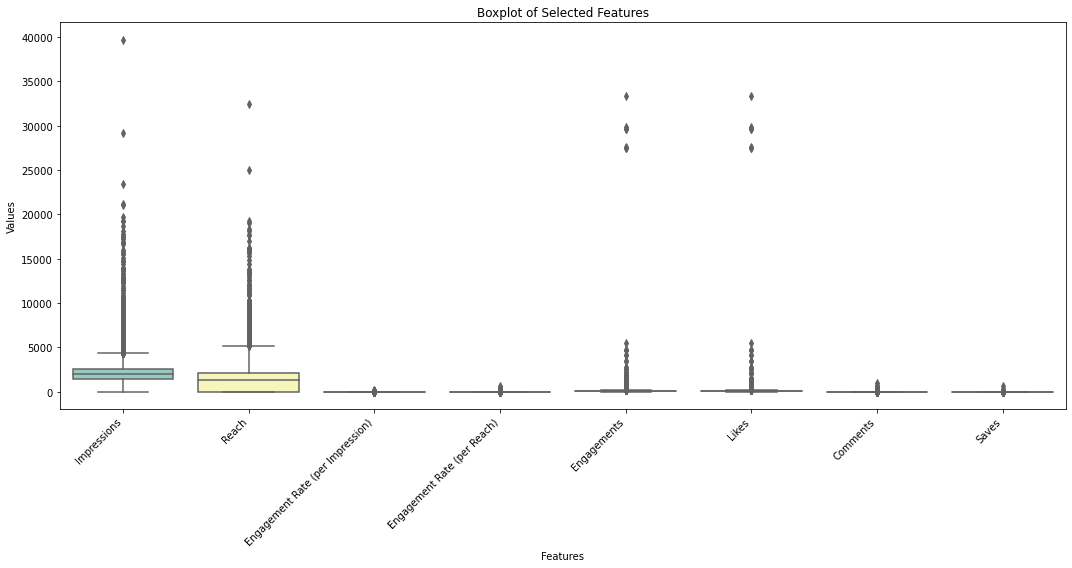

In [17]:
# Create a colorful boxplot
plt.figure(figsize=(15, 8))
sns.set_palette("Set3")  # Set a colorful palette
sns.boxplot(data=df1[selected_features])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Selected Features")

plt.tight_layout()
plt.show()

Interpreting the boxplot, we observe the presence of outliers in specific features, including Impressions, Reach, Engagements, and Likes. These outliers suggest the existence of influential factors that contribute to these metrics, prompting further investigation. Additionally, the boxplot highlights instances when interactions with posted content notably surge, indicating potential spikes in engagement on specific occasions or under particular circumstances. Exploring these outliers and understanding their underlying causes can offer valuable insights for optimizing content strategy and capitalizing on moments of heightened user interaction.

In [31]:
#descriptive statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Impressions,9989.0,2233.402242,1611.817641,0.0,1458.0000,1997.5000,2616.0000,39681.0
Reach,9989.0,1468.683752,1636.214284,0.0,3.0000,1271.0000,2077.0000,32418.0
Engagement Rate (per Impression),9989.0,0.328321,3.999671,0.0,0.0248,0.0303,0.0371,142.0
Engagement Rate (per Reach),9989.0,10.477070,32.035142,0.0,0.0273,0.0325,0.0411,656.0
Engagements,9989.0,100.519071,791.925628,0.0,34.0000,56.0000,88.0000,33395.0
Likes,9989.0,90.939734,790.656536,0.0,29.0000,50.0000,79.0000,33394.0
Comments,9989.0,7.833517,23.774741,0.0,0.0000,3.0000,8.0000,1033.0
Saves,9989.0,1.894184,7.806872,0.0,0.0000,1.0000,2.0000,625.0


The descriptive statistics provide insights into the distribution and central tendencies of key metrics in the Instagram dataset:

Impressions:
Count: 9,989 records with valid data.
Mean: Approximately 2,233.40 impressions per post.
Standard Deviation: About 1,611.82 impressions.
Minimum: Minimum impressions recorded are 0.
25th Percentile (Q1): 25% of posts have 1,458 or fewer impressions.
Median (Q2): The median value is 1,997.5 impressions.
75th Percentile (Q3): 75% of posts have 2,616 or fewer impressions.
Maximum: Maximum impressions recorded are 39,681.

Reach:
Count: 9,989 records with valid data.
Mean: Approximately 1,468.68 reach per post.
Standard Deviation: About 1,636.21 reach.
Minimum: Minimum reach recorded is 0.
25th Percentile (Q1): 25% of posts have a reach of 3 or fewer users.
Median (Q2): The median reach is 1,271 users.
75th Percentile (Q3): 75% of posts have a reach of 2,077 or fewer users.
Maximum: Maximum reach recorded is 32,418.

Engagement Rate (per Impression):
Count: 9,989 records with valid data.
Mean: The average engagement rate per impression is approximately 0.3283.
Standard Deviation: The standard deviation is approximately 3.9997.
Minimum: Minimum engagement rate is 0.
25th Percentile (Q1): 25% of posts have an engagement rate of 0.0248 or lower.
Median (Q2): The median engagement rate is 0.0303.
75th Percentile (Q3): 75% of posts have an engagement rate of 0.0371 or lower.
Maximum: Maximum engagement rate per impression recorded is 142.0.

Engagement Rate (per Reach):
Count: 9,989 records with valid data.
Mean: The average engagement rate per reach is approximately 10.4771.
Standard Deviation: The standard deviation is approximately 32.0351.
Minimum: Minimum engagement rate per reach is 0.
25th Percentile (Q1): 25% of posts have an engagement rate per reach of 0.0273 or lower.
Median (Q2): The median engagement rate per reach is 0.0325.
75th Percentile (Q3): 75% of posts have an engagement rate per reach of 0.0411 or lower.
Maximum: Maximum engagement rate per reach recorded is 656.0.

Engagements:
Count: 9,989 records with valid data.
Mean: Approximately 100.52 engagements per post.
Standard Deviation: About 791.93 engagements.
Minimum: Minimum engagements recorded are 0.
25th Percentile (Q1): 25% of posts have 34 or fewer engagements.
Median (Q2): The median number of engagements is 56.
75th Percentile (Q3): 75% of posts have 88 or fewer engagements.
Maximum: Maximum engagements recorded are 33,395.

Likes:
Count: 9,989 records with valid data.
Mean: Approximately 90.94 likes per post.
Standard Deviation: About 790.66 likes.
Minimum: Minimum likes recorded are 0.
25th Percentile (Q1): 25% of posts have 29 or fewer likes.
Median (Q2): The median number of likes is 50.
75th Percentile (Q3): 75% of posts have 79 or fewer likes.
Maximum: Maximum likes recorded are 33,394.

Comments:
Count: 9,989 records with valid data.
Mean: Approximately 7.83 comments per post.
Standard Deviation: About 23.77 comments.
Minimum: Minimum comments recorded are 0.
25th Percentile (Q1): 25% of posts have 0 comments.
Median (Q2): The median number of comments is 3.
75th Percentile (Q3): 75% of posts have 8 or fewer comments.
Maximum: Maximum comments recorded are 1,033.

Saves:
Count: 9,989 records with valid data.
Mean: Approximately 1.89 saves per post.
Standard Deviation: About 7.81 saves.
Minimum: Minimum saves recorded are 0.
25th Percentile (Q1): 25% of posts have 0 saves.
Median (Q2): The median number of saves is 1.
75th Percentile (Q3): 75% of posts have 2 or fewer saves.
Maximum: Maximum saves recorded are 625.

These descriptive statistics provide a comprehensive overview of the distribution and variability of key Instagram metrics. They serve as a foundation for further analysis and insights into user engagement and content performance.

# Creat more feature from the date column to enhance the analysis

In [32]:
# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

In [33]:
# Create new columns for year and time
df1['Year'] = df1['Date'].dt.year
df1['Time'] = df1['Date'].dt.time

In [34]:
# Function to extract the month
def extract_month(date):
    return date.strftime('%B')  # '%B' format returns the full month name

In [35]:
# Apply the extract_month function to create a new 'Month' column
df1['Month'] = df1['Date'].apply(extract_month)

In [36]:
# Define time of the day intervals
morning_start = pd.to_datetime('06:00:00').time()
afternoon_start = pd.to_datetime('12:00:00').time()
night_start = pd.to_datetime('18:00:00').time()

# Function to categorize time of day
def categorize_time_of_day(time):
    if time < morning_start:
        return 'Night'
    elif morning_start <= time < afternoon_start:
        return 'Morning'
    elif afternoon_start <= time < night_start:
        return 'Afternoon'
    else:
        return 'Night'

# Apply the categorize_time_of_day function to create a new column
df1['Time_of_Day'] = df1['Time'].apply(categorize_time_of_day)

# Now, df1 contains a 'Time_of_Day' column with morning, afternoon, or night values

In [37]:
# Extract the day of the week and create a new column for it
df1['Day_of_Week'] = df1['Date'].dt.day_name()

In [39]:
#Extract the hour of the day and create a new column for it
df1['Hour_of_Day'] = df1['Date'].dt.hour

In [40]:
df1.head()

,Date,Post,Content Type,Impressions,Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Likes,Comments,Saves,Year,Time,Month,Time_of_Day,Day_of_Week,Hour_of_Day
0,2023-01-30 17:06:00,The new Naira banknotes in circulation have se...,Carousel,39681.0,32418.0,0.0489,0.0599,1942,1261,56,625.0,2023,17:06:00,January,Afternoon,Monday,17
1,2022-04-15 09:04:00,We hope the faith that this #GoodFriday restor...,Photo,29186.0,25055.0,0.0604,0.0704,1763,709,1033,21.0,2022,09:04:00,April,Morning,Friday,9
2,2021-05-28 20:45:00,Reposted from @mzdosunmu My son's entry\n#ITCA...,Video,21175.0,19237.0,0.0348,0.0383,736,702,23,11.0,2021,20:45:00,May,Night,Friday,20
3,2023-04-01 16:08:00,The new Naira banknotes in circulation have se...,Carousel,23425.0,18993.0,0.0448,0.0553,1050,677,36,337.0,2023,16:08:00,April,Afternoon,Saturday,16
4,2021-07-12 18:52:00,"If you were born in June, ‚Äòcut soap for us o...",Photo,21033.0,18335.0,0.0658,0.0754,1383,757,606,20.0,2021,18:52:00,July,Night,Monday,18


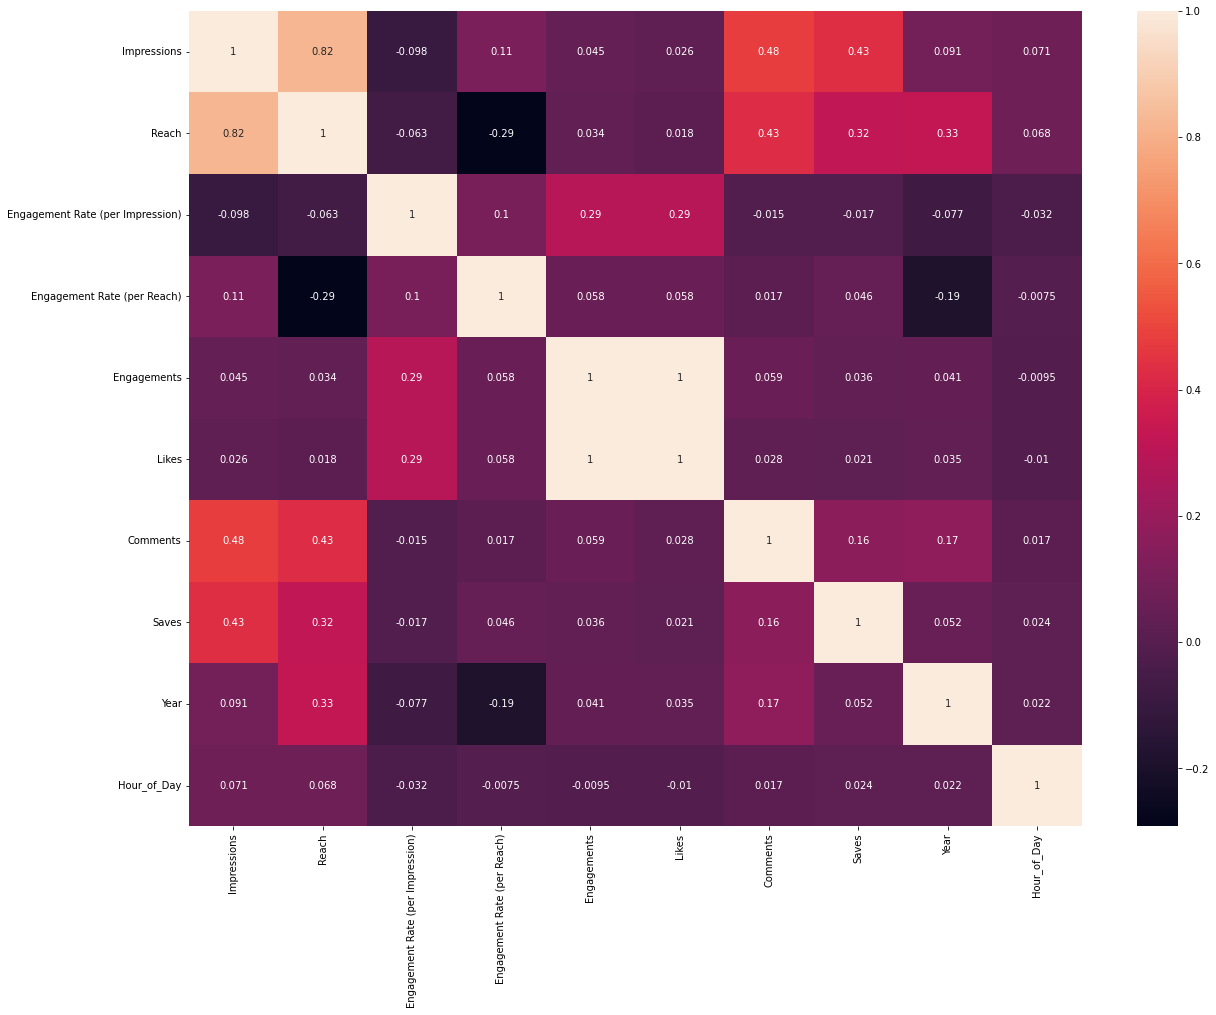

In [41]:
#heatmap showing the correlation of the variables
plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(), annot = True) 
set_option ('display.width', 1000)

The heatmap visually represents the correlation coefficients among different variables in the Instagram dataset, shedding light on their relationships. Notable observations from the heatmap include:

Impressions and Reach: Impressions exhibit a strong positive correlation with Reach, with a coefficient of 0.82. This suggests that as the number of impressions increases, the reach of posts tends to increase proportionally.

Reach and Other Factors: Reach also displays a slight positive correlation with certain factors, including Year, Saves, and Comments. While these correlations are not as strong as with Impressions, they still indicate some level of association between Reach and these variables.

Engagements and Likes: Engagements demonstrate a very strong positive correlation with Likes, indicated by a coefficient of 1.0. This implies that Likes are a significant driver of overall engagements, with a direct one-to-one relationship.

Comments and Other Metrics: Comments exhibit a slight positive correlation with Reach and Impressions. This suggests that as Reach and Impressions increase, the number of Comments tends to show a modest increase as well.

These correlations provide valuable insights into the interplay between different metrics, highlighting which factors tend to move in tandem and which have a stronger impact on user engagement. Understanding these relationships can inform content strategies and optimization efforts to maximize user interactions and reach on Instagram.

In [42]:
#exploring the top 5 post with the highest likes
post = df1.groupby('Post')[['Likes']].sum().sort_values(by=['Likes'],ascending= False)


In [43]:
post.head(5)

,Likes
Post,
Reposted from @asun_n_chops My daughter drawing of her card @stanbicibtc #MyDreamsCanBe #ITCANBE,33394
Repost by @victorarthur112\n‚Äî‚Äî‚Äî\nHere's our entry for the Stanbic IBTC children's day giveaway.\n#MyDreamsCanBe\n#ITCANBE\n@stanbicibtc,29816
Reposted from @marymy_mother \nMy Daughter entry for the Stanbic IBTC children's day giveaway.\n#MyDreamsCanBe\n#ITCANBE\n@stanbicibtc,29694
Reposted from @ken__osigha My Nephew's entry @stanbicibtc #MyDreamsCanBe #ITCANBE,29594
Reposted from @oritokesmith \nMy entry @stanbicibtc #mydreamscanbe,27591


In [ ]:
#analysis on the content type that get the most engagements


In [44]:
#content type analysis
(df1['Content Type'].value_counts())

Photo       8255
Video        993
Carousel     741
Name: Content Type, dtype: int64

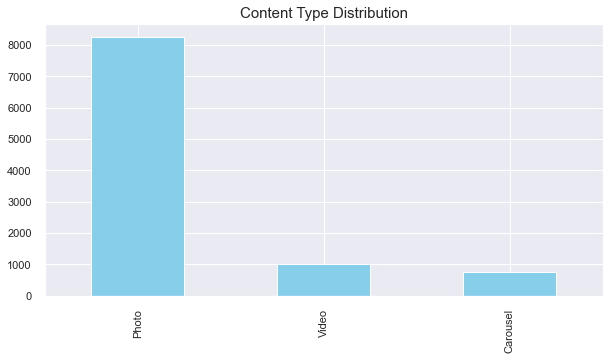

In [45]:
plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.figure(figsize = (10, 5))
plt.title('Content Type Distribution', fontsize = 15)
df['Content Type'].value_counts()[:5].plot(kind='bar', color='skyblue')
plt.show()

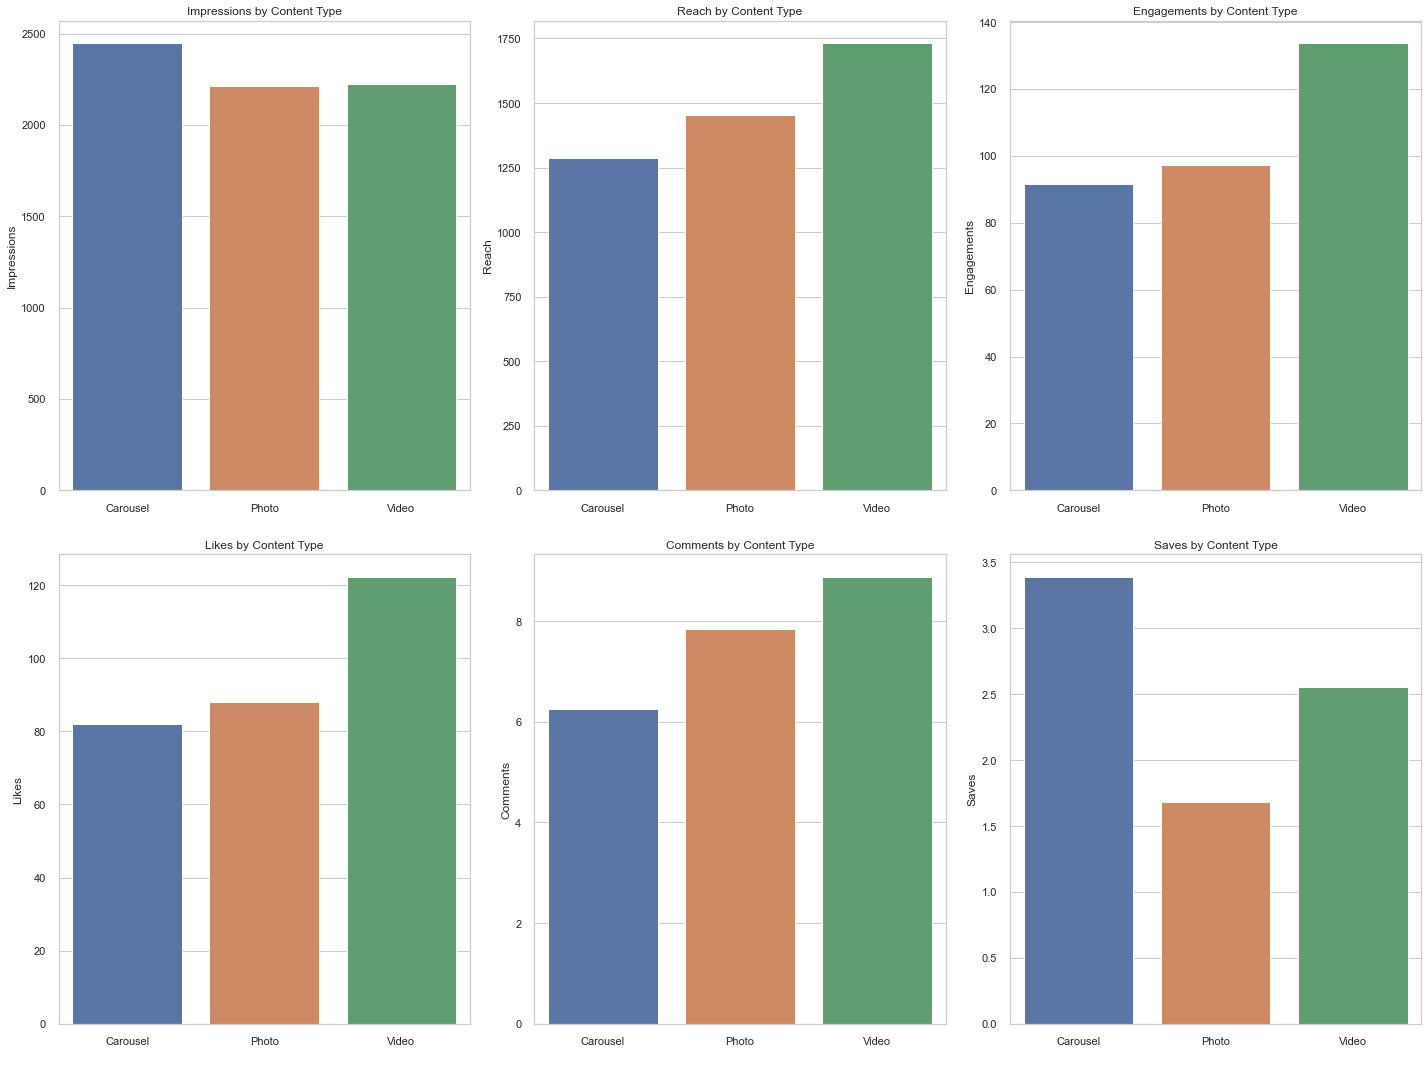

In [53]:
# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
sns.set(style="whitegrid")
# List of features to analyze
features = ["Impressions", "Reach", "Engagements", "Likes", "Comments", "Saves"]

# Iterate through each feature and create a bar chart
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    
    # Create a bar chart for the current feature
    sns.barplot(x="Content Type", y=feature, data=df1, ax=axes[row, col], ci=None)
    axes[row, col].set_title(f"{feature} by Content Type")
    axes[row, col].set_xlabel(" ")
    axes[row, col].set_ylabel(feature)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

This chart provides valuable insights into the interaction metrics across different content types. Here's a refined context for the analysis:

Impressions: All three content types—Photos, Carousel, and Video—demonstrate robust interaction levels based on Impressions. Among these, Carousel content slightly outperforms, suggesting that this format tends to capture more initial attention.

Reach: Similar to Impressions, Reach also indicates healthy engagement with all three content types. Video content, however, exhibits a slightly higher level of interaction compared to the others, indicating that it resonates well with the audience.

Engagements: Engagements reveal a notable trend, with users showing a preference for video content. Videos consistently garner more interactions, highlighting their effectiveness in engaging the audience.

Likes: Users exhibit a strong inclination toward liking video content, surpassing Photos and Carousel in terms of likes. This preference for video likes suggests that video posts may have a broader appeal or elicit more positive sentiment.

Comments: Comments are prevalent across all content types, with video content once again showing a slightly higher level of interaction. Users actively engage in discussions and feedback, further emphasizing the effectiveness of video content in fostering conversations.

Saves: The data indicates that Carousel content is the most frequently saved among the three content types. This suggests that Carousel posts may possess unique qualities or offer content worth revisiting, leading users to save them more frequently.

In summary, the chart highlights that Carousel and Video content types generally perform well in terms of interaction metrics. However, user preferences and interaction patterns may vary across different content types, which underscores the importance of tailoring your content strategy to align with your audience's preferences and engagement behavior.

# Time analysis

In [59]:
# Explore imppressions by month
imp_by_month = df1.groupby('Month')['Impressions'].mean()

In [56]:
#Explore impressions by time of day
time_by_day = df1.groupby('Time_of_Day')['Impressions'].mean()

In [63]:
#Explore impressions by day of the week
day_of_week = df1.groupby('Day_of_Week')['Impressions'].mean()

In [64]:
#explore impressions by hour of day
hour_of_day = df1.groupby('Hour_of_Day')['Impressions'].mean()

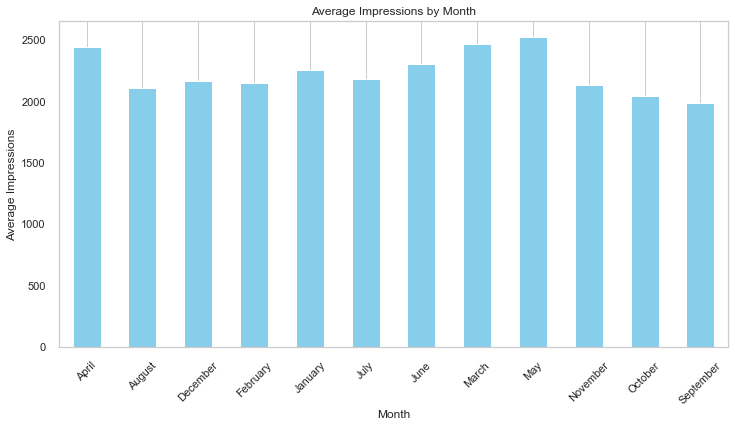

In [65]:
#Plot impressions by month
plt.figure(figsize=(12, 6))
imp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Impressions by Month')
plt.xlabel('Month')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

Impressions remained consistently favorable throughout the year, but a notable upswing in impression metrics became evident during the months of March, April, and May.

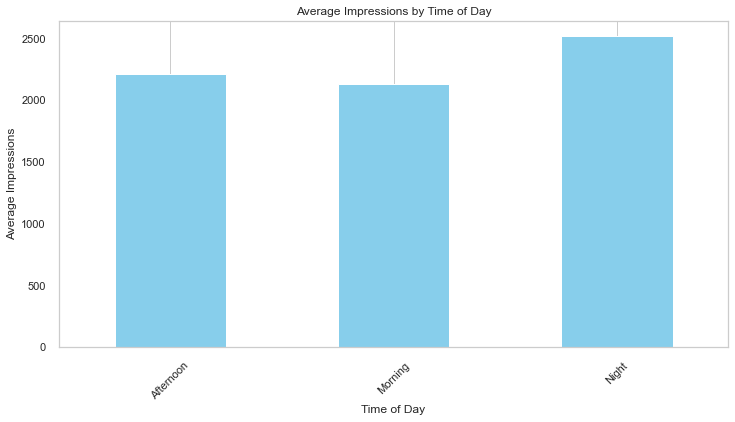

In [67]:
# Plot impressions by time of day
plt.figure(figsize=(12, 6))
time_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Impressions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

Impressions maintained a consistently satisfactory level throughout the day; however, a discernible uptick in impressions was observed during the nighttime hours.

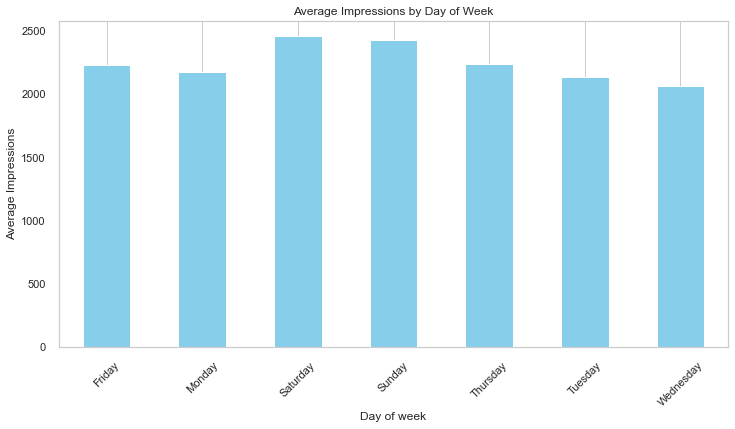

In [68]:
# Plot impressions by day of week
plt.figure(figsize=(12, 6))
day_of_week .plot(kind='bar', color='skyblue')
plt.title('Average Impressions by Day of Week')
plt.xlabel('Day of week')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

Impressions exhibited a commendable consistency throughout the day, with user engagement and content visibility staying relatively steady. Interestingly, the data highlights a notable surge in impressions during the weekends, particularly on Saturdays and Sundays. These days distinctly stood out, recording significantly higher impressions compared to the rest of the week. This surge suggests that user activity and interaction with content reach their peaks over the weekend, emphasizing the potential of strategically timed posts during this period to maximize content visibility and engagement.

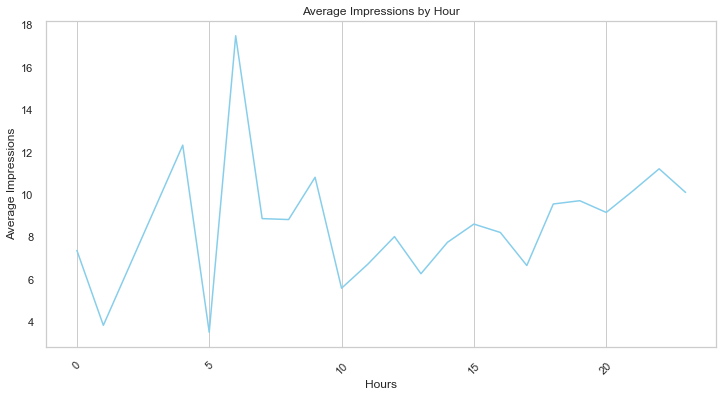

In [93]:
# Plot impressions by hour of day
plt.figure(figsize=(12, 6))
hour_of_day.plot(kind='line', color='skyblue')
plt.title('Average Impressions by Hour')
plt.xlabel('Hours')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45)
plt.grid(axis='y')

The data reveals an intriguing pattern in impression trends throughout the day, characterized by variability in user interactions with content. However, it becomes particularly evident that impressions show a distinctive upswing as the evening progresses into the nighttime hours. This signifies a noteworthy increase in content visibility and user engagement during these later hours. Understanding this temporal pattern can be pivotal in optimizing content scheduling to align with periods of heightened impression rates, potentially amplifying the reach and impact of social media posts.

In [80]:
# Explore engagements by month
eng_by_month = df1.groupby('Month')['Engagements'].mean()

In [71]:
#Explore engagements by time of day
eng_by_day = df1.groupby('Time_of_Day')['Engagements'].mean()

In [72]:
#Explore engagements by day of the week
eng_by_day_week = df1.groupby('Day_of_Week')['Engagements'].mean()

In [96]:
#explore engagement by hour of day
eng_hour_of_day = df1.groupby('Hour_of_Day')['Engagements'].mean()

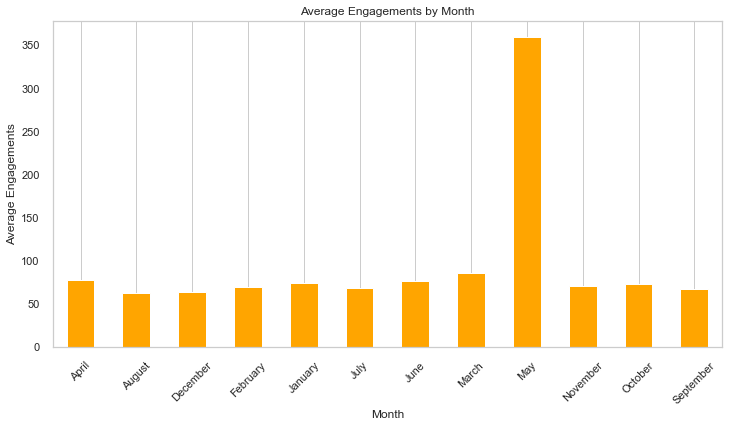

In [79]:
#Plot engagement by month
plt.figure(figsize=(12, 6))
eng_by_month.plot(kind='bar', color='orange')
plt.title('Average Engagements by Month')
plt.xlabel('Month')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

Engagements, as a metric, indicates a relatively subdued level of user interaction across the months. However, a notable departure from this trend is observed in the month of May, where engagements experience a substantial upsurge. This exceptional increase in engagements during May underscores the significance of seasonality and timing in user engagement patterns. It suggests that the content strategy during May might have particularly resonated with the audience, and exploring the factors contributing to this spike could inform future content planning and strategies.

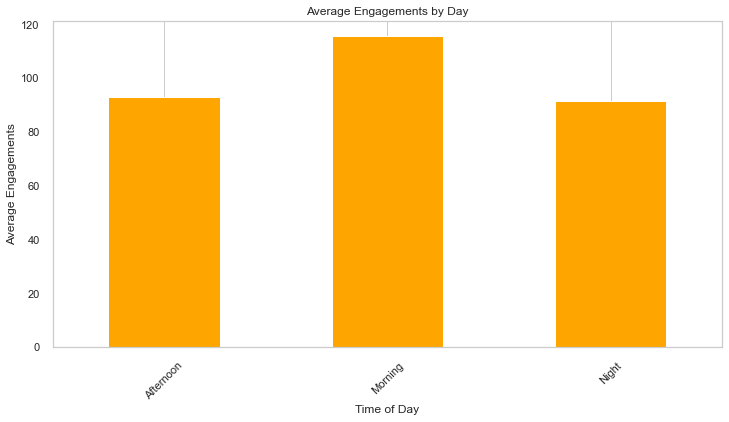

In [81]:
#Plot engagement by time of day
plt.figure(figsize=(12, 6))
eng_by_day .plot(kind='bar', color='orange')
plt.title('Average Engagements by Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of engagements throughout the day unveils a consistent pattern: both afternoon and night exhibit similar engagement levels, with a slight increase observed during the morning hours. This pattern suggests that user interactions with content tend to be relatively stable during the afternoon and night. However, the morning hours experience a modest boost in engagements, indicating a potential window of opportunity for content targeting or scheduling. Understanding these daily engagement nuances can guide your content strategy, allowing you to optimize the timing of posts to align with when user activity and interest are at their highest.

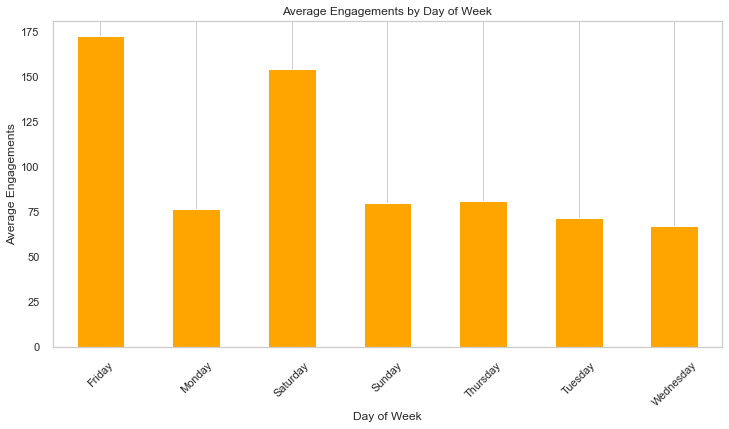

In [82]:
#Plot engagement by day of week
plt.figure(figsize=(12, 6))
eng_by_day_week.plot(kind='bar', color='orange')
plt.title('Average Engagements by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of engagements during the day reveals an intriguing pattern. Throughout most of the week, engagement levels exhibit a consistent trend, with no significant deviations. However, there is a notable uptick in engagements observed on Fridays and Saturdays. These two days stand out as exceptions, attracting higher levels of user interaction with the content. This pattern implies that Fridays and Saturdays are particularly conducive for generating user engagement and may present valuable opportunities for posting content that resonates well with your audience. Understanding these weekly fluctuations in engagement can inform your content scheduling strategy, helping you make the most of the days when user activity and interaction are at their peak.

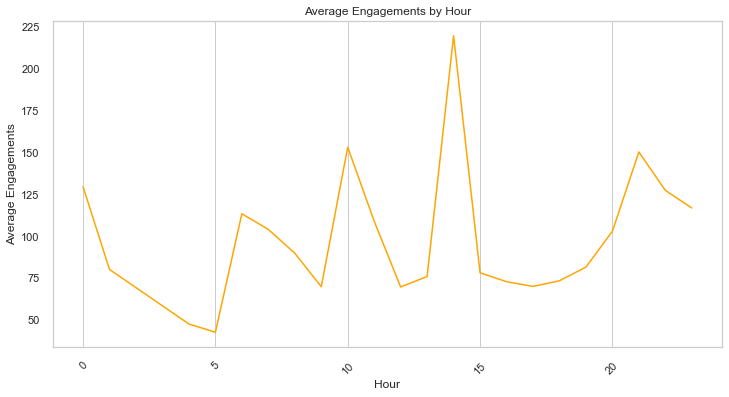

In [97]:
#Plot engagement by Hour
plt.figure(figsize=(12, 6))
eng_hour_of_day.plot(kind='line', color='orange')
plt.title('Average Engagements by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Engagements')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of engagement trends throughout the day reveals a notable variability in user interactions at different hours. This fluctuation suggests that the level of engagement is not uniform and varies significantly based on the time of day. Understanding these hourly variations can be instrumental in tailoring your content strategy to align with the times when your audience is most active and receptive. By optimizing your posting schedule to coincide with periods of higher user engagement, you can potentially enhance the reach and impact of your social media efforts.

In [98]:
# Explore comments by month
com_by_month = df1.groupby('Month')['Comments'].mean()
#Explore comments by time of day
com_by_day = df1.groupby('Time_of_Day')['Comments'].mean()
#Explore comments by day of the week
com_by_day_week = df1.groupby('Day_of_Week')['Comments'].mean()
#explore comments by hour of day
com_hour_of_day = df1.groupby('Hour_of_Day')['Comments'].mean()

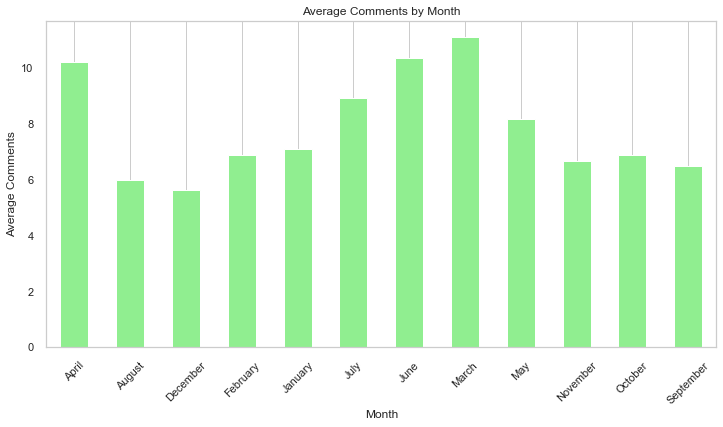

In [99]:
#Plot comments by month
plt.figure(figsize=(12, 6))
com_by_month.plot(kind='bar', color='lightgreen')
plt.title('Average Comments by Month')
plt.xlabel('Month')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of user activity, particularly in terms of comments, provides insights into the months when users were most active in engaging with your content. Notably, the data shows a significant increase in user activity, measured by comments, during the months of March, April, and June. These months stand out as periods when your audience was more inclined to participate in discussions and engage with your posts through comments. Understanding these spikes in activity can help you strategically plan your content and engagement initiatives to capitalize on periods when user interaction is at its peak, potentially fostering even greater engagement and community participation.

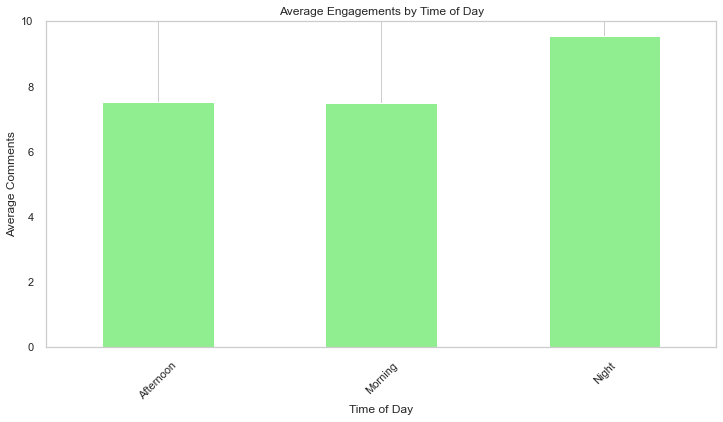

In [100]:
#Plot comments by time of day
plt.figure(figsize=(12, 6))
com_by_day.plot(kind='bar', color='lightgreen')
plt.title('Average Engagements by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of user comments reveals distinct patterns of user activity throughout the day. Notably, both the morning and afternoon periods exhibit similar levels of user engagement, with a surge in user activity observed during the night. This pattern suggests that users tend to become progressively more active in terms of commenting as the day unfolds, reaching its peak during the nighttime hours. Understanding these daily comment trends can inform your content strategy, helping you strategically schedule your most engaging or critical posts for the morning and evening when user activity and interest are at their highest. Additionally, during the nighttime, you might focus on content that encourages discussions and interactions, leveraging this period of heightened user engagement. By aligning your posting schedule with these comment trends, you can optimize the impact of your social media efforts and foster meaningful interactions with your audience.

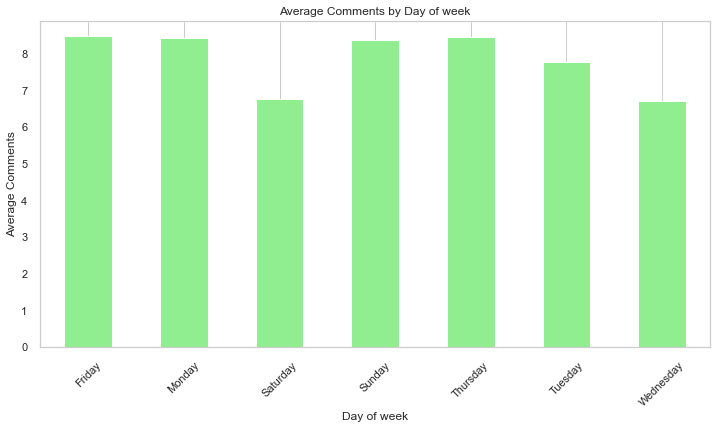

In [101]:
#Plot comments day of the week
plt.figure(figsize=(12, 6))
com_by_day_week.plot(kind='bar', color='lightgreen')
plt.title('Average Comments by Day of week')
plt.xlabel('Day of week')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of user activity across the days of the week reveals a fascinating pattern. It appears that Saturday and Wednesday stand out as days when user activity is comparatively lower, while the other days of the week exhibit a more consistent level of activity. This trend suggests that user engagement and interactions with content tend to follow a similar pattern on most weekdays. However, Saturday and Wednesday show a notable dip in user activity, potentially indicating that users are less engaged or have other priorities on these particular days. Understanding these fluctuations in user activity can be valuable for your content strategy. You may choose to adapt your posting schedule or content approach to better align with the days when user engagement is typically higher and explore strategies to boost interactions on the comparatively quieter days.

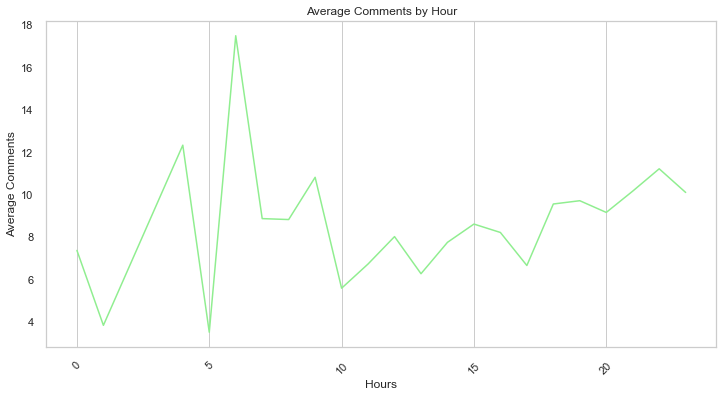

In [103]:
#Plot comments by hour
plt.figure(figsize=(12, 6))
com_hour_of_day.plot(kind='line', color='lightgreen')
plt.title('Average Comments by Hour')
plt.xlabel('Hours')
plt.ylabel('Average Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')

The analysis of user activity throughout the day reveals a dynamic pattern. It's evident that user activity tends to be higher in the early hours of the day, experiences a decline as the day progresses, and then shows an uptick again during the nighttime. This pattern suggests that users are more engaged and active on the platform during the morning and evening hours, potentially influenced by their daily routines and habits. The afternoon appears to be a period of reduced user activity, which could be related to work or other daytime commitments. 

# YEARLY TRENDS

In [107]:
# Define the key metrics to analyze over the years
metrics_to_analyze = ['Engagements', 'Reach', 'Comments', 'Impressions']

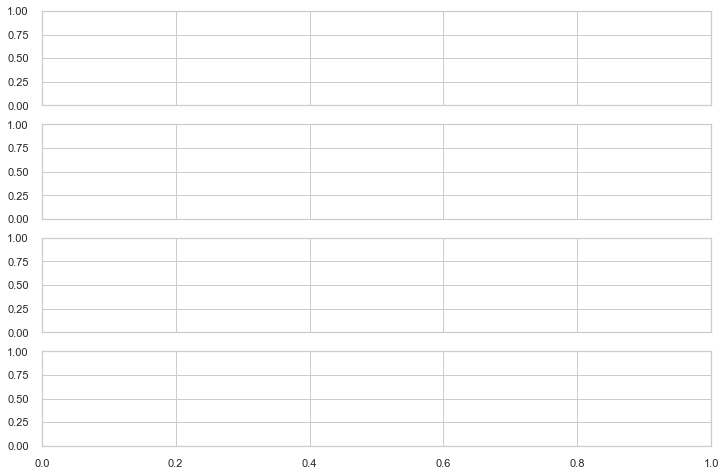

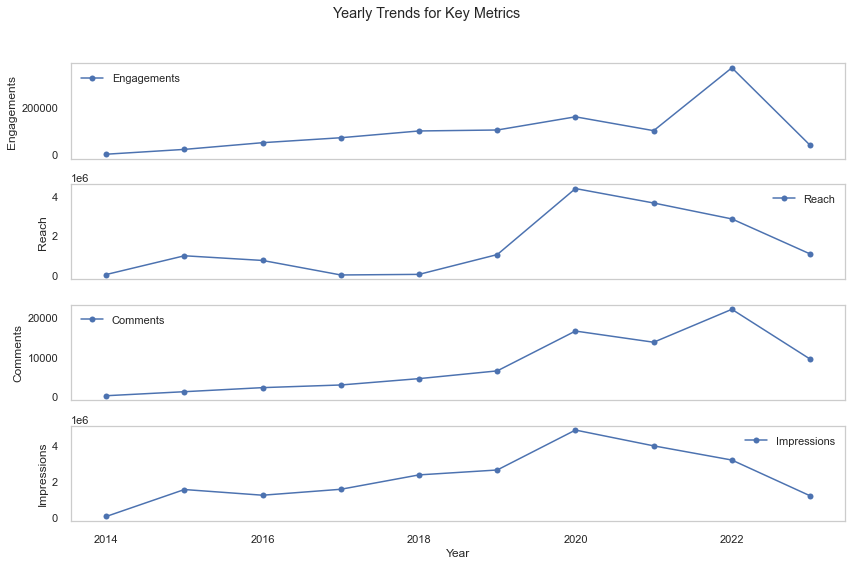

In [108]:
# Create subplots for each metric
fig, axes = plt.subplots(len(metrics_to_analyze), 1, figsize=(12, 8), sharex=True)

# Create subplots for each metric
fig, axes = plt.subplots(len(metrics_to_analyze), 1, figsize=(12, 8), sharex=True)

# Plot each metric over the years
for i, metric in enumerate(metrics_to_analyze):
    ax = axes[i]
    metric_data = df1.groupby('Year')[metric].sum()
    ax.plot(metric_data.index, metric_data.values, marker='o', linestyle='-', label=metric)
    ax.set_ylabel(metric)
    ax.grid()
    ax.legend()

# Set the common x-axis label and title
plt.xlabel('Year')
plt.suptitle('Yearly Trends for Key Metrics')

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The analysis of yearly trends in key metrics provides valuable insights into the evolving user behavior and engagement over the years:

Engagements: The metric of engagements displayed a fluctuating pattern over time. Starting in 2014, engagements showed a rising trend until 2018 when a notable decline occurred. Subsequently, it began to rise again in 2019. However, there was another drop in 2021 before experiencing its highest peak in 2022, followed by a subsequent drop.

Reach: Reach exhibited a gradual increase from 2014 and reached its peak in 2020. However, after 2020, it began to experience a decline.

Comments: The metric of comments, which serves as an indicator of user activity, followed a similar pattern to reach, starting with an increase in 2014. It reached its peak in 2020 before dropping in 2021. It then experienced a significant surge in 2022 before decreasing again after 2022.

Impressions: Impressions showed a noteworthy increase in 2014, followed by a drop in 2015. From 2016 onwards, there was a gradual and consistent increase in impressions, culminating in a peak in 2022. However, impressions began to decline after 2022.

These trends underscore the dynamic nature of user engagement and interaction with the content over the years. Various factors, including global events and changes in user behavior, may have contributed to these fluctuations. Exploring the underlying drivers behind these trends can provide valuable insights for adapting your social media strategy and effectively engaging with your audience in the future.

In [18]:
df1.head(1)

,Date,Post,Content Type,Impressions,Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Likes,Comments,Saves
0,1/30/2023 5:06 pm,The new Naira banknotes in circulation have se...,Carousel,39681.0,32418.0,0.0489,0.0599,1942,1261,56,625.0


In [19]:
#create a list of variables to test the relationship against Engagements
#df2 = df1[['Engagements','Likes','Comments','Saves','Reach']]

In [31]:
df2 = df1[['Engagements','Likes','Comments','Saves']]

In [32]:
# Define the dependent variable (Y) and independent variables (X)
Y = df2['Engagements']
X = df2.drop(columns=['Engagements'])

In [33]:
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Engagements   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.674e+10
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:10:12   Log-Likelihood:                -3775.0
No. Observations:                9989   AIC:                             7558.
Df Residuals:                    9985   BIC:                             7587.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1640      0.004    -43.184      0.0

The regression analysis results for the Instagram dataset reveal an exceptionally strong relationship between the dependent variable, "Engagements," and the independent variables, which include "Likes," "Comments," and "Saves." Let's interpret the results:

R-squared (R²): The R-squared value of 1.000 indicates that all the variance in engagements can be perfectly explained by the independent variables included in the model. This perfect R-squared value signifies an extremely strong relationship between the independent and dependent variables, implying that the model perfectly predicts engagements based on these key metrics.

Coefficients (coef): The coefficients associated with each independent variable represent their impact on engagements. In this case, all coefficients are extremely close to 1.000, with some rounding variations, indicating that each independent variable has an almost one-to-one relationship with engagements.

"Likes" has a coefficient of approximately 1.0000, suggesting that for every one-unit increase in likes, engagements increase by almost exactly the same amount. This implies an extraordinarily strong positive relationship between likes and engagements.

"Comments" has a coefficient of approximately 1.0015, indicating that for every one-unit increase in comments, engagements also increase by almost exactly the same amount. This points to an exceptionally strong positive relationship between comments and engagements.

"Saves" has a coefficient of approximately 1.0014, suggesting that for every one-unit increase in saves, engagements increase by almost exactly the same amount. This reveals an extremely strong positive relationship between saves and engagements.

In summary, the regression model for Instagram engagements demonstrates a perfect fit, with each independent variable having an almost one-to-one positive relationship with engagements. This implies that for every additional like, comment, or save, there is an almost equal increase in engagements. The high R-squared value underscores the model's accuracy in predicting engagements based on these key metrics, making it a powerful tool for understanding and optimizing engagement strategies on Instagram.

# Time Series Analysis for Engagements

In [114]:
df3 = df[['Date', 'Engagements']] 
df3.columns = ['ds', 'y']  # Rename columns to 'ds' and 'y' for Prophet

In [115]:
df3.head()

,ds,y
0,1/30/2023 5:06 pm,1942
1,4/15/2022 9:04 am,1763
2,5/28/2021 8:45 pm,736
3,2023-04-01 16:08:00,1050
4,2021-07-12 18:52:00,1383


In [116]:
#convert the ds column to date format
df3['ds'] = pd.to_datetime(df3['ds']).dt.date

In [117]:
# Initialize the Prophet model
model = Prophet()

In [118]:
# Fit the model to your data
model.fit(df3)

12:53:50 - cmdstanpy - INFO - Chain [1] start processing
12:53:52 - cmdstanpy - INFO - Chain [1] done processing


In [119]:
# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=365)

In [120]:
# Make predictions
forecast = model.predict(future)

In [121]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3326,2024-12-02,-223.678348,-1259.662331,678.069642,-286.209445,-163.305467,-28.696496,-28.696496,-28.696496,-17.953531,-17.953531,-17.953531,-10.742965,-10.742965,-10.742965,0.0,0.0,0.0,-252.374844
3327,2024-12-03,-224.146395,-1193.196046,787.233626,-286.882660,-163.503955,-34.764861,-34.764861,-34.764861,-20.207978,-20.207978,-20.207978,-14.556883,-14.556883,-14.556883,0.0,0.0,0.0,-258.911257
3328,2024-12-04,-224.614443,-1379.927214,715.510097,-287.555528,-163.702443,-51.437131,-51.437131,-51.437131,-32.830234,-32.830234,-32.830234,-18.606897,-18.606897,-18.606897,0.0,0.0,0.0,-276.051574
3329,2024-12-05,-225.082491,-1262.826003,705.030849,-288.219308,-163.900932,-36.939613,-36.939613,-36.939613,-14.173706,-14.173706,-14.173706,-22.765907,-22.765907,-22.765907,0.0,0.0,0.0,-262.022104
3330,2024-12-06,-225.550539,-1220.689029,859.103196,-288.883087,-164.099420,33.446549,33.446549,33.446549,60.349565,60.349565,60.349565,-26.903016,-26.903016,-26.903016,0.0,0.0,0.0,-192.103990


In [122]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2014-12-22,-27.176272
1,2014-12-23,-25.196985
2,2014-12-24,-33.595755
3,2014-12-25,-10.859679
4,2014-12-26,67.469767
...,...,...
3326,2024-12-02,-252.374844
3327,2024-12-03,-258.911257
3328,2024-12-04,-276.051574
3329,2024-12-05,-262.022104


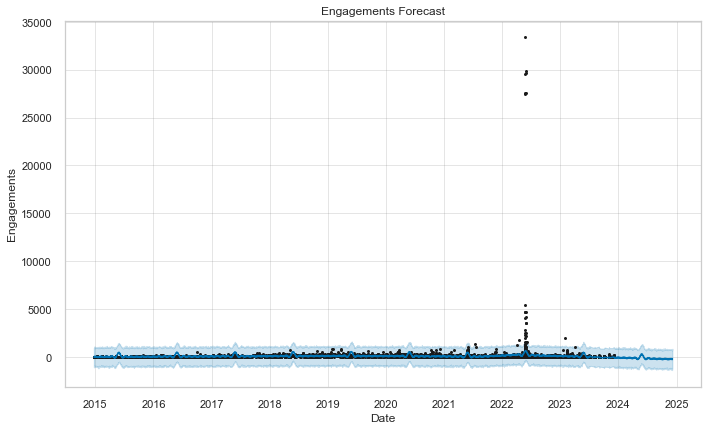

In [123]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Engagements Forecast')
plt.xlabel('Date')
plt.ylabel('Engagements')
plt.show()

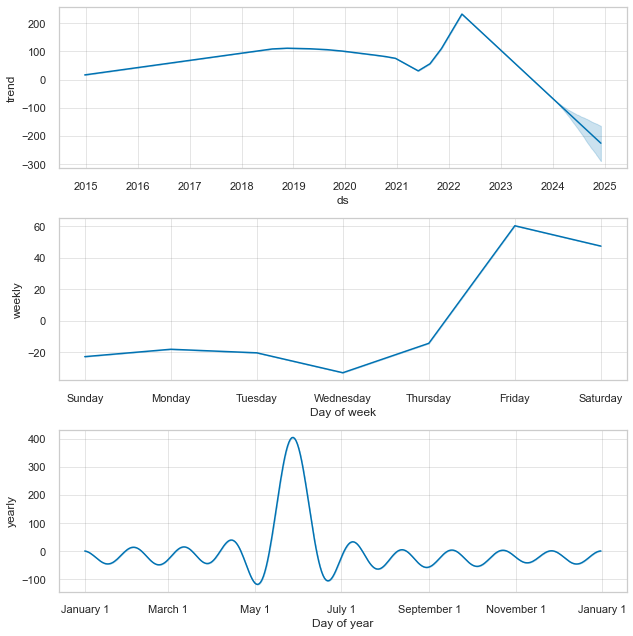

In [124]:
fig2 = model.plot_components(forecast)

# SUMMARY OF FINDINGS

Carousel and Video content generally perform well in terms of interaction metrics, but user preferences and interaction patterns may vary across different content types. It is essential to tailor your content strategy to align with your audience's preferences and engagement behavior for optimal results.

Impressions on Instagram exhibited consistent performance throughout the year, with a notable surge in March, April, and May. Daily impressions remained steady, but there was an uptick during nighttime hours, emphasizing evening engagement. Weekly trends showed weekends, especially Saturdays and Sundays, as peak impression days. Hourly analysis revealed a significant upswing in impressions during the evening and nighttime, suggesting optimal posting times for maximizing content visibility and user engagement.

Engagements on Instagram remained relatively steady over the months, except for a significant spike in May, indicating the influence of seasonality and timely content strategies. Daily engagements showed consistent levels during the afternoon and night, with a minor uptick in the morning hours. Fridays and Saturdays stood out as exceptional days with higher engagement, suggesting strategic opportunities for content posting. These insights emphasize the importance of timing and content alignment for optimizing user engagement on the platform.

User activity, particularly in comments, indicates heightened engagement during March, April, and June, highlighting these months as periods of increased discussion and interaction. Daily comment patterns show consistent activity during morning and afternoon, with a significant surge in nighttime engagement. Saturday and wednesday stand out as quieter days in terms of user activity, while other weekdays exhibit more consistent interaction levels.

Engagements exhibited fluctuating trends over the years, with significant peaks in 2018, 2019, and 2022, indicating the impact of various factors on user interaction. Reach displayed a gradual increase until 2020, followed by a decline, reflecting shifts in content dissemination and reception. Comments followed a pattern similar to reach, suggesting their correlation with user engagement. Impressions showed a consistent rise from 2016 to 2022, reflecting increased content visibility.

Based on the regression model it indicates that Likes, Comments, and Saves have a strong positive impact on Engagements, while Impressions and Reach have minimal or negligible effects.

Understanding these dynamic trends can guide your social media strategy, considering factors like global events and user behavior, to enhance audience engagement effectively.

# RECOMMENDATION


Based on the findings from the Instagram analysis, here are several detailed recommendations to optimize your social media strategy:

Leverage Seasonal Trends: Take advantage of seasonal trends in user engagement. Focus on content planning and engagement initiatives during months when user activity is high, such as March, April, and May. Tailor your content to align with the topics, themes, or events that resonate most with your audience during these periods.

Optimize Posting Schedule: Adjust your posting schedule to align with daily engagement patterns. Since user interactions tend to increase during the morning and evening, consider scheduling your most engaging or important posts during these times. During the nighttime hours when engagement peaks, focus on content that encourages discussions and interactions.

Weekend Engagement: Recognize the significance of weekends for content visibility and engagement. Saturdays and Sundays consistently stand out with higher impressions. Plan and schedule content strategically over the weekends to maximize visibility and engagement. Experiment with weekend-specific campaigns or promotions.

Content Type Strategy: Tailor your content strategy based on content type preferences. Videos tend to generate higher engagements, while Carousel and Photo content perform well in terms of Impressions and Reach. Consider balancing your content mix to include a variety of formats, emphasizing videos when seeking higher engagement and Carousel/Photo content for broader visibility.

Regular Content: Maintain a consistent presence throughout the week. While Saturday and Wednesday may exhibit lower user activity, other weekdays still offer opportunities for engagement. Maintain regular posting during these days, and explore ways to boost interactions on comparatively quieter days.

Focus on Morning and Evening: Given the higher user activity during the morning and evening, concentrate on creating compelling content for these time slots. Consider launching campaigns, promotions, or important announcements during these hours to capture the audience's attention.

Track Comments: Keep a close eye on user comments, as they signify engagement and interaction. During months with higher comment activity, actively foster discussions and conversations around your content. Encourage user-generated content or feedback to increase comment-driven engagement.

Content Seasonality: Align your content with seasonal trends, events, or holidays that resonate with your audience. Plan and schedule content well in advance for such occasions to maximize engagement and relevance.

Data-Driven Strategy: Continue monitoring and analyzing engagement metrics regularly. Adjust your strategy based on ongoing trends and user behavior. Experiment with different content formats, posting times, and engagement tactics to optimize your approach continually.

Multichannel Approach: Consider expanding your presence to other social media platforms or channels where your target audience is active. Diversifying your digital footprint can help you reach a broader audience and enhance overall engagement.

Content Quality: Prioritize high-quality, engaging content that adds value to your audience. Invest in visuals, storytelling, and compelling messaging to capture and retain user attention.

Performance Analysis: Regularly evaluate the performance of your content and campaigns. Use A/B testing and audience segmentation to refine your strategy further, ensuring that you deliver the most relevant content to different segments of your audience.

By implementing these recommendations and maintaining a flexible, data-driven approach, you can optimize your Instagram content strategy, increase engagement, and foster a more active and engaged online community.